## Import Required Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

## load Dataset

In [3]:
excel_file = 'SupplyChainEmisionFactorsForIndustriesCommodities.xlsx'
years = range(2010, 2017)

In [4]:
years[0]

2010

In [5]:
ds_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
ds_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [6]:
ds_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
ds_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [7]:
all_data = []

for year in years:
    try:
        ds_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        ds_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        ds_com['Source'] = 'Commodity'
        ds_ind['Source'] = 'Industry'
        ds_com['Year'] = ds_ind['Year'] = year

        ds_com.columns = ds_com.columns.str.strip()
        ds_ind.columns = ds_ind.columns.str.strip()

        ds_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace= True)

        ds_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([ds_com, ds_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [8]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [9]:
len(all_data)

7

In [10]:
ds = pd.concat(all_data, ignore_index= True)
ds.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [11]:
len(ds)

22092

## Data Preprocessing

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors witho

In [13]:
ds.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [14]:
ds.isnull().sum()

Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
dtype: int64

In [15]:
ds.drop(columns=['Unnamed: 7'], inplace=True)

In [16]:
ds.rename(columns={
    'Supply Chain Emission Factors without Margins': 'EmissionFactor_woMargin',
    'Margins of Supply Chain Emission Factors': 'EmissionMargin',
    'Supply Chain Emission Factors with Margins': 'EmissionFactor_withMargin',
    'DQ ReliabilityScore of Factors without Margins': 'Reliability',
    'DQ TemporalCorrelation of Factors without Margins': 'TemporalCorrelation',
    'DQ GeographicalCorrelation of Factors without Margins': 'GeoCorrelation',
    'DQ TechnologicalCorrelation of Factors without Margins': 'TechCorrelation',
    'DQ DataCollection of Factors without Margins': 'DataCollection'
}, inplace=True)

ds.dropna(inplace = True)

In [17]:
ds.head(3)

,Code,Name,Substance,Unit,EmissionFactor_woMargin,EmissionMargin,EmissionFactor_withMargin,Reliability,TemporalCorrelation,GeoCorrelation,TechCorrelation,DataCollection,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,3,1,4,1,Commodity,2010


In [18]:
ds.describe()

,EmissionFactor_woMargin,EmissionMargin,EmissionFactor_withMargin,Reliability,TemporalCorrelation,GeoCorrelation,TechCorrelation,DataCollection,Year
count,22092.000000,22092.000000,22092.000000,22092.000000,22092.000000,22092.0,22092.000000,22092.0,22092.000000
mean,0.084807,0.012857,0.097681,3.308030,2.571429,1.0,2.632129,1.0,2013.000000
std,0.267039,0.078720,0.288992,0.499643,0.494883,0.0,1.135661,0.0,2.000045
min,0.000000,0.000000,0.000000,2.000000,2.000000,1.0,1.000000,1.0,2010.000000
25%,0.000000,0.000000,0.000000,3.000000,2.000000,1.0,1.000000,1.0,2011.000000
50%,0.002000,0.000000,0.003000,3.000000,3.000000,1.0,3.000000,1.0,2013.000000
75%,0.044000,0.000000,0.052000,4.000000,3.000000,1.0,3.000000,1.0,2015.000000
max,7.228000,3.349000,7.290000,4.000000,3.000000,1.0,5.000000,1.0,2016.000000


In [19]:
# #  Encode Categorical Features

# le_name = LabelEncoder()
# le_substance = LabelEncoder()
# le_source = LabelEncoder()

# ds['Name_encoded'] = le_name.fit_transform(ds['Name'])
# ds['Substance_encoded'] = le_substance.fit_transform(ds['Substance'])
# ds['Source_encoded'] = le_source.fit_transform(ds['Source'])


In [20]:
# Normalize/Scale Numerical Columns

scaler = StandardScaler()
numerical_cols = [
    'EmissionFactor_woMargin',
    'EmissionMargin',
    'EmissionFactor_withMargin',
    'Reliability',
    'TemporalCorrelation',
    'GeoCorrelation',
    'TechCorrelation',
    'DataCollection'
]

# Create a copy for scaled data
ds_scaled = ds.copy()
ds_scaled[numerical_cols] = scaler.fit_transform(ds[numerical_cols])


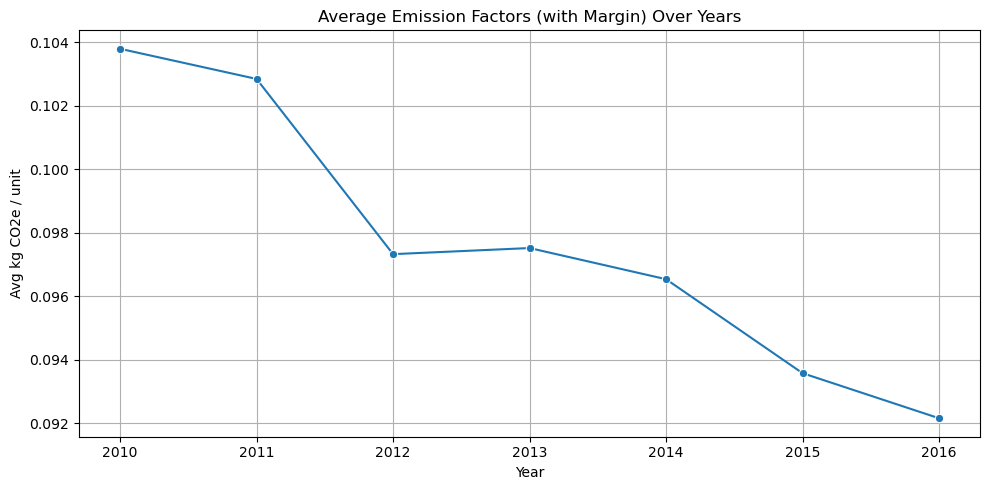

In [21]:
# Average Emission Factors per Year
if 'EmissionFactor_withMargin' in ds.columns:
    yearly_emissions = ds.groupby('Year')['EmissionFactor_withMargin'].mean()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=yearly_emissions.index, y=yearly_emissions.values, marker='o')
    plt.title('Average Emission Factors (with Margin) Over Years')
    plt.ylabel('Avg kg CO2e / unit')
    plt.xlabel('Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'EmissionFactor_withMargin' not found in dataset.")


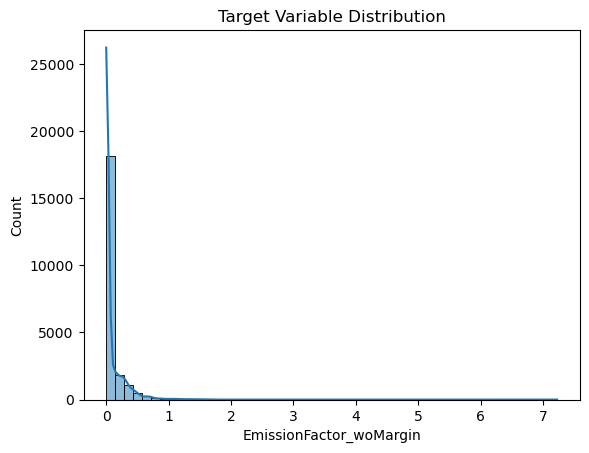

In [22]:
# Visualize distribution
sns.histplot(ds['EmissionFactor_woMargin'],bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

In [23]:
# Check categorical variables
print(ds['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [24]:
# Checking unique values in 'Unit' with count
print(ds['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [25]:
# Checking unique values in 'Unit'
print(ds['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [26]:
# Checking unique values in 'Source' with count 
print(ds['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [27]:
# Checking unique values in 'Substance' 
ds['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [28]:
# Mapping substances to integers 
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3} 

In [29]:
ds['Substance']=ds['Substance'].map(substance_map) 

In [30]:
# Checking unique values in 'Substance' 
ds['Substance'].unique() # Checking unique values in 'Substance' 

array([0, 1, 2, 3], dtype=int64)

In [31]:
# Checking unique values in 'Unit' 
print(ds['Unit'].unique()) 

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [32]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1} # Mapping units to integers 

In [33]:
ds['Unit']=ds['Unit'].map(unit_map)

In [34]:
# Checking unique values in 'Unit' 
print(ds['Unit'].unique()) 

[0 1]


In [35]:
# Checking unique values in 'Source' 
print(ds['Source'].unique()) 

['Commodity' 'Industry']


In [36]:
# Mapping sources to integers 
source_map={'Commodity':0, 'Industry':1} 

In [37]:
# applying the mapping to 'Source' column 
ds['Source']=ds['Source'].map(source_map)

In [38]:
# Checking unique values in 'Source' 
print(ds['Source'].unique()) 

[0 1]


In [39]:
# Checking data types and non-null counts after mapping 
ds.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Code                       22092 non-null  object 
 1   Name                       22092 non-null  object 
 2   Substance                  22092 non-null  int64  
 3   Unit                       22092 non-null  int64  
 4   EmissionFactor_woMargin    22092 non-null  float64
 5   EmissionMargin             22092 non-null  float64
 6   EmissionFactor_withMargin  22092 non-null  float64
 7   Reliability                22092 non-null  int64  
 8   TemporalCorrelation        22092 non-null  int64  
 9   GeoCorrelation             22092 non-null  int64  
 10  TechCorrelation            22092 non-null  int64  
 11  DataCollection             22092 non-null  int64  
 12  Source                     22092 non-null  int64  
 13  Year                       22092 non-null  int

In [40]:
# Checking unique values in 'Code' ds['Code']
ds.Code.unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [41]:
# Checking unique values in 'Name' 
ds.Name.unique() 

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [42]:
# Checking number of unique values in 'Name' 
len(ds.Name.unique()) 

713

In [43]:
top_emitters = ds[['Name', 'EmissionFactor_withMargin']].groupby('Name').mean().sort_values(
    'EmissionFactor_withMargin', ascending=False).head(10) 

# Resetting index for better plotting
top_emitters = top_emitters.reset_index()

In [44]:
top_emitters

,Name,EmissionFactor_withMargin
0,Cement manufacturing,1.686179
1,Cement,1.324964
2,"Electric power generation, transmission, and d...",1.220357
3,Electricity,1.016143
4,"Dolls, toys, and games",0.832179
5,Lime and gypsum products,0.816536
6,Lime and gypsum product manufacturing,0.799679
7,Industrial gas manufacturing,0.612929
8,Compressed Gases,0.539679
9,Clothing,0.468714


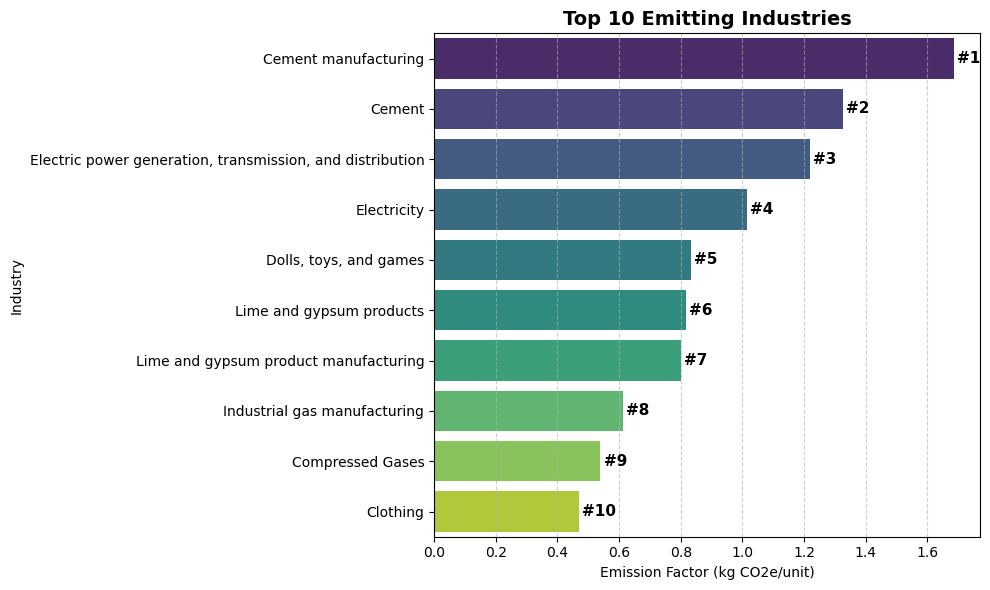

In [45]:
# Plotting the top 10 emitting industries
plt.figure(figsize=(10,6))

# Example: Top emitting industries (already grouped)
sns.barplot(
    x='EmissionFactor_withMargin',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='viridis' 
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['EmissionFactor_withMargin'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold')
plt.xlabel('Emission Factor (kg CO2e/unit)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [46]:
ds.drop(columns=['Name','Code','Year'], inplace=True) 

In [47]:
ds.head(1)

,Substance,Unit,EmissionFactor_woMargin,EmissionMargin,EmissionFactor_withMargin,Reliability,TemporalCorrelation,GeoCorrelation,TechCorrelation,DataCollection,Source
0,0,0,0.398,0.073,0.47,4,3,1,4,1,0


In [48]:
ds.shape

(22092, 11)

In [49]:
ds.columns

Index(['Substance', 'Unit', 'EmissionFactor_woMargin', 'EmissionMargin',
       'EmissionFactor_withMargin', 'Reliability', 'TemporalCorrelation',
       'GeoCorrelation', 'TechCorrelation', 'DataCollection', 'Source'],
      dtype='object')

In [50]:
# Feature set excluding the target variable
X = ds.drop(columns=['EmissionFactor_withMargin']) 

# Target variable
y = ds['EmissionFactor_withMargin']  

In [51]:
X.head()

,Substance,Unit,EmissionFactor_woMargin,EmissionMargin,Reliability,TemporalCorrelation,GeoCorrelation,TechCorrelation,DataCollection,Source
0,0,0,0.398,0.073,4,3,1,4,1,0
1,1,0,0.001,0.001,4,3,1,1,1,0
2,2,0,0.002,0.000,4,3,1,4,1,0
3,3,1,0.002,0.000,3,3,1,3,1,0
4,0,0,0.659,0.081,4,3,1,4,1,0


In [52]:
y.head()

0    0.470
1    0.002
2    0.002
3    0.002
4    0.740
Name: EmissionFactor_withMargin, dtype: float64

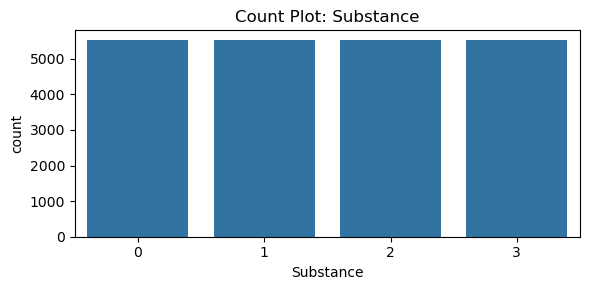

In [53]:
# Count plot for Substance
plt.figure(figsize=(6, 3))
sns.countplot(x=ds["Substance"])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.show()

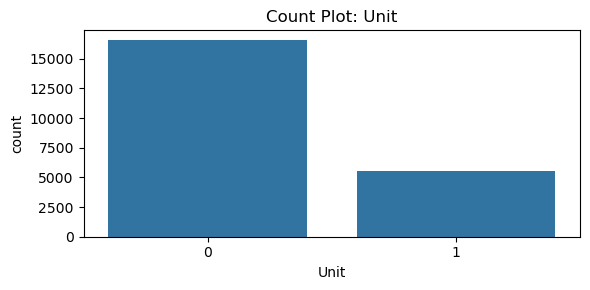

In [54]:
# Count plot for Unit
plt.figure(figsize=(6, 3))
sns.countplot(x=ds["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()

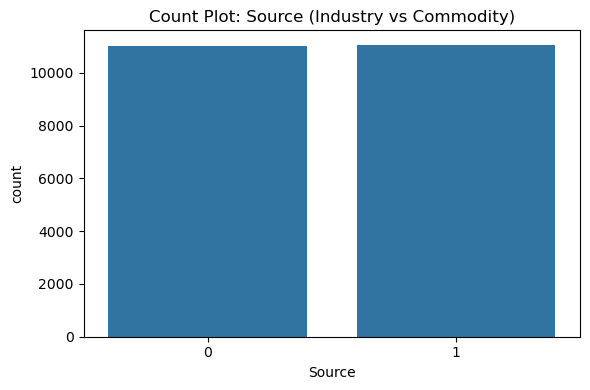

In [55]:
# Count plot for Source
plt.figure(figsize=(6, 4))
sns.countplot(x=ds["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()


In [56]:
# Checking correlation between numerical features 
ds.select_dtypes(include=np.number).corr() 

,Substance,Unit,EmissionFactor_woMargin,EmissionMargin,EmissionFactor_withMargin,Reliability,TemporalCorrelation,GeoCorrelation,TechCorrelation,DataCollection,Source
Substance,1.000000e+00,7.745967e-01,-0.391851,-0.218400,-0.421603,0.095092,-3.667637e-15,NaN,0.198415,NaN,4.273306e-16
Unit,7.745967e-01,1.000000e+00,-0.155859,-0.094300,-0.169741,-0.025159,-3.173071e-17,NaN,0.286990,NaN,-1.545892e-17
EmissionFactor_woMargin,-3.918505e-01,-1.558594e-01,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,2.713112e-02
EmissionMargin,-2.184002e-01,-9.429989e-02,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,-6.750426e-02
EmissionFactor_withMargin,-4.216032e-01,-1.697410e-01,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,6.687828e-03
Reliability,9.509190e-02,-2.515938e-02,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,-1.228726e-02
TemporalCorrelation,-3.667637e-15,-3.173071e-17,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-2.909814e-15
GeoCorrelation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TechCorrelation,1.984154e-01,2.869901e-01,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,2.827202e-02
DataCollection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Substance                  22092 non-null  int64  
 1   Unit                       22092 non-null  int64  
 2   EmissionFactor_woMargin    22092 non-null  float64
 3   EmissionMargin             22092 non-null  float64
 4   EmissionFactor_withMargin  22092 non-null  float64
 5   Reliability                22092 non-null  int64  
 6   TemporalCorrelation        22092 non-null  int64  
 7   GeoCorrelation             22092 non-null  int64  
 8   TechCorrelation            22092 non-null  int64  
 9   DataCollection             22092 non-null  int64  
 10  Source                     22092 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.9 MB


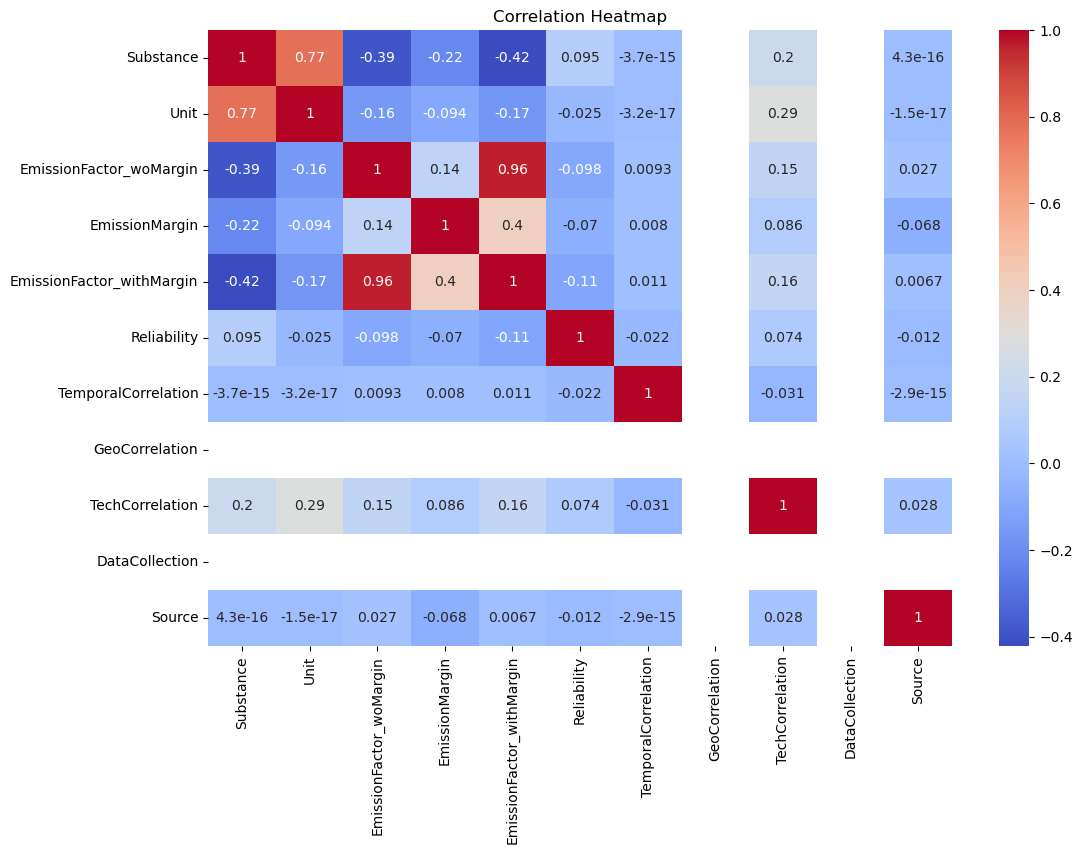

In [58]:
# Correlation matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(ds.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Normalize features

In [59]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,22092.0,1.500000,1.118059,0.0,0.75,1.500,2.250,3.000
Unit,22092.0,0.250000,0.433023,0.0,0.00,0.000,0.250,1.000
EmissionFactor_woMargin,22092.0,0.084807,0.267039,0.0,0.00,0.002,0.044,7.228
EmissionMargin,22092.0,0.012857,0.078720,0.0,0.00,0.000,0.000,3.349
Reliability,22092.0,3.308030,0.499643,2.0,3.00,3.000,4.000,4.000
TemporalCorrelation,22092.0,2.571429,0.494883,2.0,2.00,3.000,3.000,3.000
GeoCorrelation,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
TechCorrelation,22092.0,2.632129,1.135661,1.0,1.00,3.000,3.000,5.000
DataCollection,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
Source,22092.0,0.500634,0.500011,0.0,0.00,1.000,1.000,1.000


In [60]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:

X_scaled[0].min(),X_scaled[0].max()

(-1.3416407864998738, 1.3849614361966767)

In [64]:
np.round(X_scaled.mean()),np.round(X_scaled.std())

(-0.0, 1.0)

# Divide the data into train and test

In [65]:
X.shape

(22092, 10)

In [69]:
# Splitting data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
X_train.shape

(17673, 10)

In [71]:
X_test.shape


(4419, 10)

# Select the model for training

In [72]:
# Initializing Random Forest Regressor 
RF_model = RandomForestRegressor(random_state=42) 

# Training

In [73]:
# Fitting the model on training data 
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Prediction and Evaluation

In [74]:
# Making predictions on the test set 
RF_y_pred = RF_model.predict(X_test)

In [75]:
RF_y_pred[:20]

array([2.93080000e-01, 1.00000000e-03, 1.21122793e-03, 1.16130018e-03,
       0.00000000e+00, 4.00000000e-03, 1.24555977e-04, 2.20009044e-03,
       2.00000000e-03, 3.94080000e-01, 0.00000000e+00, 1.40000000e-02,
       4.08395607e-03, 7.00000000e-03, 2.15970231e-03, 2.89160331e-04,
       1.02821706e-03, 3.15790000e-01, 9.00000000e-03, 0.00000000e+00])

In [76]:
RF_mse = mean_squared_error(y_test, RF_y_pred) # Calculating Mean Squared Error (MSE)
RF_rmse = np.sqrt(RF_mse) # Calculating Root Mean Squared Error (RMSE)
# Calculating R² score
RF_r2 = r2_score(y_test, RF_y_pred)

print(f'RMSE: {RF_rmse}')
print(f'R² Score: {RF_r2}')

RMSE: 0.006143789217304181
R² Score: 0.9993280085696331


In [77]:

from sklearn.linear_model import LinearRegression # Importing Linear Regression model 
LR_model = LinearRegression() # Initializing Linear Regression model
# Fitting the Linear Regression model on training data

LR_model.fit(X_train, y_train)

LR_y_pred = LR_model.predict(X_test) # Making predictions on the test set using Linear Regression model 


LR_mse = mean_squared_error(y_test, LR_y_pred) # Calculating Mean Squared Error (MSE) for Linear Regression model
LR_rmse = np.sqrt(LR_mse) # Calculating Root Mean Squared Error (RMSE) for Linear Regression model 
LR_r2 = r2_score(y_test, LR_y_pred) # Calculating R² score for Linear Regression model 

print(f'RMSE: {LR_rmse}')
print(f'R² Score: {LR_r2}')

RMSE: 0.00028073792916296123
R² Score: 0.9999985968848819


## Hyperparameter Tuning

In [78]:
# Hyperparameter tuning for Random Forest Regressor using GridSearchCV 
# Define the parameter grid for hyperparameter tuning 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Perform grid search with cross-validation to find the best hyperparameters 
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

# Fit the grid search model on the training data 
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


## Use best parameters for prediction

In [82]:
# Use the best model to make predictions on the test set 
y_pred_best = best_model.predict(X_test)


HP_mse = mean_squared_error(y_test, y_pred_best)
HP_rmse = np.sqrt(HP_mse)
HP_r2 = r2_score(y_test, y_pred_best)

print(f'RMSE: {HP_rmse}')
print(f'R² Score: {HP_r2}')

RMSE: 0.005948528382514106
R² Score: 0.9993700440298772


## Comapartive Study and Slecting the Best model

In [83]:
# Create a comparative DataFrame for all models
results = {
    'Model': ['Random Forest (Default)', 'Linear Regression', 'Random Forest (Tuned)'],
    'MSE': [RF_mse, LR_mse, HP_mse],
    'RMSE': [RF_rmse, LR_rmse, HP_rmse],
    'R2': [RF_r2, LR_r2, HP_r2]
}

# Create a DataFrame to compare the results of different models
comparison_df = pd.DataFrame(results)
print(comparison_df)

                     Model           MSE      RMSE        R2
0  Random Forest (Default)  3.774615e-05  0.006144  0.999328
1        Linear Regression  7.881378e-08  0.000281  0.999999
2    Random Forest (Tuned)  3.538499e-05  0.005949  0.999370


## Save model and encoders

In [84]:
!mkdir models 

In [86]:
# Save model and encoders 
joblib.dump(best_model, 'models/LR_model.pkl')    # Save the best model 
joblib.dump(scaler, 'models/scaler.pkl') # Save the scaler used for normalization

['models/scaler.pkl']